In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf anthracnose/


In [ ]:
!unzip /content/drive/MyDrive/klasifikasi-kulit-jagung/anthracnose-20250126T075241Z-001.zip -d dataset
!unzip /content/drive/MyDrive/klasifikasi-kulit-jagung/giberella-20250126T074908Z-001.zip -d dataset
!unzip /content/drive/MyDrive/klasifikasi-kulit-jagung/sehat-20250126T075148Z-001.zip -d dataset

Archive:  /content/drive/MyDrive/klasifikasi-kulit-jagung/giberella-20250126T074908Z-001.zip
  inflating: dataset/giberella/090.jpg  
  inflating: dataset/giberella/095.jpg  
  inflating: dataset/giberella/091.jpg  
  inflating: dataset/giberella/089.jpg  
  inflating: dataset/giberella/069.jpg  
  inflating: dataset/giberella/077.jpg  
  inflating: dataset/giberella/094.jpg  
  inflating: dataset/giberella/070.jpg  
  inflating: dataset/giberella/084.jpg  
  inflating: dataset/giberella/071.jpg  
  inflating: dataset/giberella/073.jpg  
  inflating: dataset/giberella/097.jpg  
  inflating: dataset/giberella/079.jpg  
  inflating: dataset/giberella/082.jpg  
  inflating: dataset/giberella/092.jpg  
  inflating: dataset/giberella/078.jpg  
  inflating: dataset/giberella/072.jpg  
  inflating: dataset/giberella/096.jpg  
  inflating: dataset/giberella/074.jpg  
  inflating: dataset/giberella/099.jpg  
  inflating: dataset/giberella/088.jpg  
  inflating: dataset/giberella/076.jpg  
  inf

In [ ]:
import os
import shutil
import random

# Parameters
input_dir = 'dataset'  # Input directory with original dataset
output_dir = '/content/drive/MyDrive/klasifikasi-kulit-jagung/original'  # Output directory for the new structure
os.makedirs(output_dir, exist_ok=True)

train_and_val_ratio = 0.8
split_ratios = (
    0.8 * train_and_val_ratio,
    0.2 * train_and_val_ratio,
    0.2
)  # Ratios for train, val, and test splits

# Ensure output directories exist
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

# Get all class folders
classes = os.listdir(input_dir)

for class_name in classes:
    class_path = os.path.join(input_dir, class_name)
    images = os.listdir(class_path)

    # Shuffle images
    random.shuffle(images)

    # Compute split sizes
    total_images = len(images)

    train_end = int(split_ratios[0] * total_images)
    val_end = train_end + int(split_ratios[1] * total_images)

    # Split images
    train_images = images[:train_end]
    val_images = images[train_end:val_end]
    test_images = images[val_end:]

    # Create class directories in output directories
    os.makedirs(os.path.join(output_dir, 'train', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', class_name), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', class_name), exist_ok=True)

    # Move images to respective directories
    for img in train_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'train', class_name, img))
    for img in val_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'val', class_name, img))
    for img in test_images:
        shutil.move(os.path.join(class_path, img), os.path.join(output_dir, 'test', class_name, img))

print("Dataset split completed.")


100
100
100
Dataset split completed.


# CLAHE preprocessing

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

dataset_path = '/content/drive/MyDrive/klasifikasi-kulit-jagung'

os.makedirs(os.path.join(dataset_path, 'clahe'), exist_ok=True)

for set_data in os.listdir(os.path.join(dataset_path, 'original')): # Train, val, test

    os.makedirs(os.path.join(dataset_path, 'clahe', set_data), exist_ok=True)
    for clas in os.listdir(os.path.join(dataset_path, 'original', set_data)): # early, benign, pre, pro

        os.makedirs(os.path.join(dataset_path, 'clahe', set_data, clas), exist_ok=True)
        for img in os.listdir(os.path.join(dataset_path, 'original', set_data, clas)): # file name

            img_path = os.path.join(dataset_path, 'original', set_data, clas, img)

            image = cv2.imread(img_path)
            lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
            l, a, b = cv2.split(lab)

            l = clahe.apply(l)

            lab = cv2.merge([l, a, b])

            image = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
            cv2.imwrite(
                filename=os.path.join(
                    dataset_path, 'clahe', set_data, clas, img
                ),
                img=image
            )

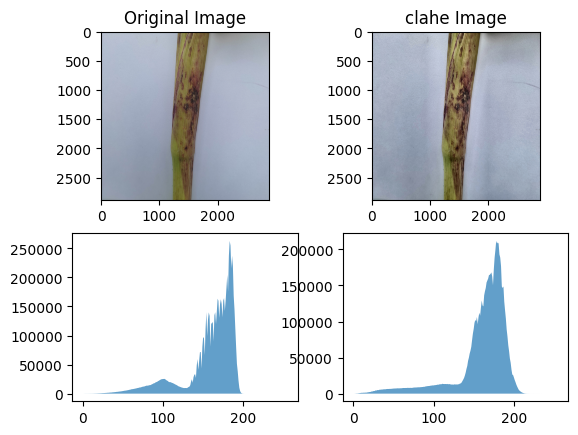

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
# Load the image in grayscale
fig, axs = plt.subplots(nrows=2, ncols=2)

original_image_path = '/content/drive/MyDrive/klasifikasi-kulit-jagung/original/test/anthracnose/004.jpg'  # Replace with your image file path
image = cv2.imread(original_image_path)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

axs[0][0].imshow(image)
axs[0][0].set_title('Original Image')

histogram, bins = np.histogram(grayscale.ravel(), bins=256, range=[0, 256])
axs[1][0].fill_between(np.arange(256), 0, histogram, alpha=0.7)


clahe_image_path = '/content/drive/MyDrive/klasifikasi-kulit-jagung/clahe/test/anthracnose/004.jpg'  # Replace with your image file path
image = cv2.imread(clahe_image_path)
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

axs[0][1].imshow(image)
axs[0][1].set_title('clahe Image')

histogram, bins = np.histogram(grayscale.ravel(), bins=256, range=[0, 256])
axs[1][1].fill_between(np.arange(256), 0, histogram, alpha=0.7)
